# D209 Assessment 1

# 1. Import Packages and Data

In [1]:
# Used to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Used to work with dataframes
import pandas as pd

# Used to work with arrays
import numpy as np

# Used for data visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Used for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Used for feature selection
from sklearn.ensemble import RandomForestClassifier

# Used to build pipeline with steps to scale and fit models
from sklearn.pipeline import Pipeline

# Used for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
# Read in csv file into pandas dataframe "churn_df"
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# Inspect head of churn data
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# 2. Pre-processing

In [4]:
# List variables, null counts, and dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### Rename survey columns

In [5]:
# Create dictionary for survey variables that need to be renamed
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

# Rename variables
churn_df.rename(columns=churn_item_cols, inplace=True)

#### Convert categorical (yes/no) fields to binary numeric (1/0)

In [6]:
# Create list of columns to convert
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']
# Run for loop iterating through columns to convert, pass dictionary through map function to convert yes/no to 1/0
for i in converted_columns:
    churn_df[i] = churn_df[i].map({'Yes':1, 'No':0})

#### Convert categorical data to numeric with dummy variables

In [7]:
# Use pandas get dummies for categorical fields "Area", "Marital", "Gender", "Contract"
categorical_conversions = ['Area', 'Marital', 'Contract']
dummy_variables = ['Area_Rural', 'Area_Suburban',
                    'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                    'Marital_Separated', 'Marital_Widowed',
                    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']

churn_numeric = pd.get_dummies(churn_df, columns=categorical_conversions)

In [8]:
# Create dataframe with only numeric variables
churn_numeric = churn_numeric[[
                            'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
                            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
                            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
                            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
                            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
                            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
                            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                            'Marital_Separated', 'Marital_Widowed','Contract_Month-to-month', 'Contract_One year', 
                            'Contract_Two Year'
                            ]]

#### Display summary statistics

In [9]:
churn_numeric.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_Month-to-month,Contract_One year,Contract_Two Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.332700,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.202700,0.545600,0.210200,0.244200
std,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.471204,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.402031,0.497941,0.407471,0.429633
min,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,111850.000000,10.0000,89.000000,258900.700000,1.000000,21.207230,23.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualize boxplots of continuous variables to investigate distribution of data and potential outliers

In [10]:
# Create dataframe of numeric non-binary variables
churn_anomaly_detect = churn_df[['Population', 'Children', 'Age', 
                         'Income', 'Outage_sec_perweek', 'Email', 
                         'Contacts', 'Yearly_equip_failure', 'Tenure', 
                         'MonthlyCharge', 'Bandwidth_GB_Year']]

# Standardize data by subtracting each value by its mean and then dividing by the standard deviation
churn_anomaly_detect_standardized = (churn_anomaly_detect - churn_anomaly_detect.mean())/churn_anomaly_detect.std()

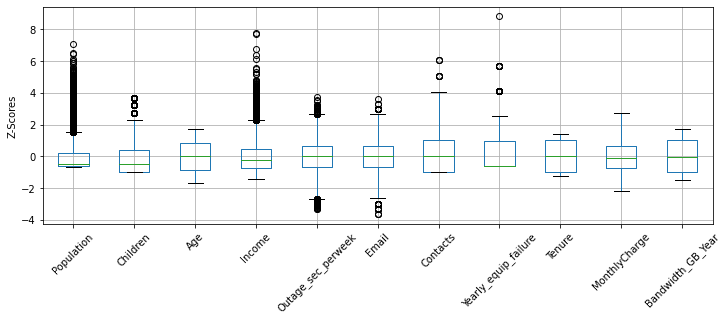

In [11]:
# Enlarge plot to fit all boxplots
fig, ax = plt.subplots(figsize=[12,4])

# Create boxplot of each variable
churn_anomaly_detect_standardized.boxplot()
# Rotate x labels
plt.xticks(rotation=45)
# Title y axis
plt.ylabel('Z-Scores')
plt.show()

# 3. Write function for model evaluation procedure

In [12]:
head_sep = '\n'+'='*100+'\n'*2
subhead_sep = '-'*60

def knn_model_eval():
    
    # Accuracy tests of train and test
    print('Test and train accuracy scores')
    print(subhead_sep)
    print(knn.score(X_train, y_train))
    print(knn.score(X_test, y_test))
    print(head_sep)
    
    # Classification report
    print('Classification Report')
    print(subhead_sep)
    print(classification_report(y_pred, y_test))
    print(head_sep)
    
    # Confusion matrix
    print('Confusion Matrix')
    print(subhead_sep)
    churn_log_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
    print(head_sep)
    
    # ROC Curve and AUC Score
    print('ROC & Precision Recall Curve')
    print(subhead_sep)
    y_pred_proba = knn.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print('\n')
    print('Area under curve: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))
    print(head_sep)
    
    # Cross validation score
    print('Cross Validation Scores')
    print(subhead_sep)
    cv_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
    print('AUC scores computed using 5-fold cross-validation: {}'.format(cv_auc))
    print('AUC average: {:.2f}'.format(np.mean(cv_auc)))
    print('AUC standard deviation: {:.2f}'.format(np.std(cv_auc)))


# 4. Initial KNN Model

In [13]:
# Import KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for dependent and independent variables
X = churn_numeric.drop('Churn', axis=1).values
y = churn_numeric['Churn']

# Split data between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 24)

# Create KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = knn.predict(X_test)

Test and train accuracy scores
------------------------------------------------------------
0.8111428571428572
0.724



Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2331
           1       0.40      0.47      0.43       669

    accuracy                           0.72      3000
   macro avg       0.62      0.63      0.62      3000
weighted avg       0.74      0.72      0.73      3000




Confusion Matrix
------------------------------------------------------------


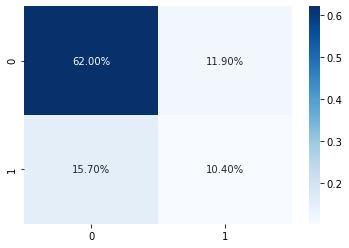




ROC & Precision Recall Curve
------------------------------------------------------------


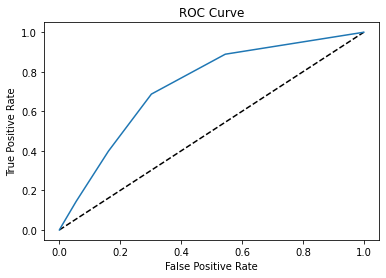



Area under curve: 0.73



Cross Validation Scores
------------------------------------------------------------
AUC scores computed using 5-fold cross-validation: [0.50064241 0.59998331 0.88123027 0.87234886 0.71929277]
AUC average: 0.71
AUC standard deviation: 0.15


In [14]:
knn_model_eval()

# 5. Scaled feature model

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize standard scaler
scaler = StandardScaler() 
# Standardize and fit/ transform reduced dependent variables
X_stnd = scaler.fit_transform(X)

# Split data between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state = 24)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = knn.predict(X_test)

Test and train accuracy scores
------------------------------------------------------------
0.8881428571428571
0.8366666666666667



Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2355
           1       0.60      0.73      0.66       645

    accuracy                           0.84      3000
   macro avg       0.76      0.80      0.77      3000
weighted avg       0.85      0.84      0.84      3000




Confusion Matrix
------------------------------------------------------------


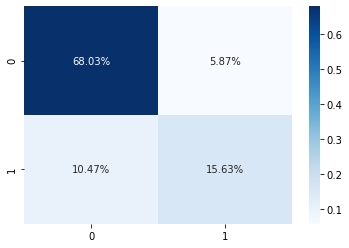




ROC & Precision Recall Curve
------------------------------------------------------------


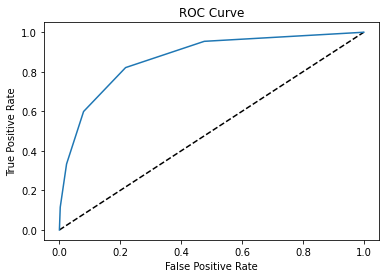



Area under curve: 0.87



Cross Validation Scores
------------------------------------------------------------
AUC scores computed using 5-fold cross-validation: [0.50064241 0.59998331 0.88123027 0.87234886 0.71929277]
AUC average: 0.71
AUC standard deviation: 0.15


In [16]:
knn_model_eval()

# 6. Feature selection

In [17]:
# Initialize decision tree classifier
rfc = RandomForestClassifier(random_state=24, criterion='entropy', max_depth=10)
# Fit data to decision tree classifier
rfc.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=24)

In [18]:
# Create empty list to add features to
churn_features = []
# Create empty list to add feature importance scores to
churn_feature_scores = []
# Print title
print('Feature Importance Scores')
print('='*50+'\n')
# Iterate through enumerated list
for i, column in enumerate(churn_numeric.drop('Churn', axis=1)):
    # Print column and feature importance scores
    print('{} --- {:0.3f}'.format(column, rfc.feature_importances_[i]))
    # Append features and scores to empty lists above for sorting
    churn_features.append(column)
    churn_feature_scores.append(rfc.feature_importances_[i])

Feature Importance Scores

Population --- 0.018
Children --- 0.008
Age --- 0.016
Income --- 0.019
Outage_sec_perweek --- 0.017
Email --- 0.011
Contacts --- 0.005
Yearly_equip_failure --- 0.004
Techie --- 0.006
Port_modem --- 0.003
Tablet --- 0.002
Phone --- 0.001
Multiple --- 0.015
OnlineSecurity --- 0.002
OnlineBackup --- 0.004
DeviceProtection --- 0.003
TechSupport --- 0.003
StreamingTV --- 0.047
StreamingMovies --- 0.070
PaperlessBilling --- 0.002
Tenure --- 0.234
MonthlyCharge --- 0.141
Bandwidth_GB_Year --- 0.181
Timely_Response --- 0.006
Timely_Fixes --- 0.006
Timely_Replacements --- 0.006
Reliability --- 0.007
Options --- 0.007
Respectful_Response --- 0.006
Courteous_Exchange --- 0.006
Active_Listening --- 0.006
Area_Rural --- 0.002
Area_Suburban --- 0.002
Area_Urban --- 0.002
Marital_Divorced --- 0.002
Marital_Married --- 0.002
Marital_Never Married --- 0.002
Marital_Separated --- 0.002
Marital_Widowed --- 0.002
Contract_Month-to-month --- 0.074
Contract_One year --- 0.020
Cont

In [19]:
# Create dataframe with pandas and zip function from churn feature lists
churn_feature_scores_df = pd.DataFrame(zip(churn_features, churn_feature_scores), columns=['Feature', 'Feature Importance'])
# Sort and display dataframe in descending order by feature importance score
churn_feature_scores_df.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
20,Tenure,0.233790
22,Bandwidth_GB_Year,0.181305
21,MonthlyCharge,0.141428
39,Contract_Month-to-month,0.073970
18,StreamingMovies,0.070055
17,StreamingTV,0.046702
41,Contract_Two Year,0.028483
40,Contract_One year,0.019755
3,Income,0.018636
0,Population,0.017946


# 7. Reduced Model

In [20]:
# Set independent variables
X = churn_numeric[['Tenure', 'MonthlyCharge', 'Contract_Month-to-month', 'StreamingMovies']].values
# Set dependent variable
y = churn_numeric['Churn']

# Initialize standard scaler
scaler = StandardScaler() 
# Standardize and fit/ transform reduced dependent variables
X_stnd = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state=24)

# Create KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = knn.predict(X_test)

Test and train accuracy scores
------------------------------------------------------------
0.9001428571428571
0.8733333333333333



Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2209
           1       0.76      0.75      0.76       791

    accuracy                           0.87      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.87      0.87      0.87      3000




Confusion Matrix
------------------------------------------------------------


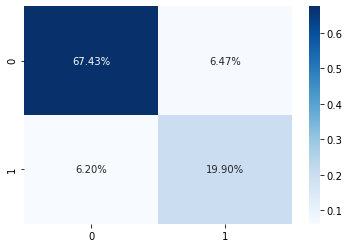




ROC & Precision Recall Curve
------------------------------------------------------------


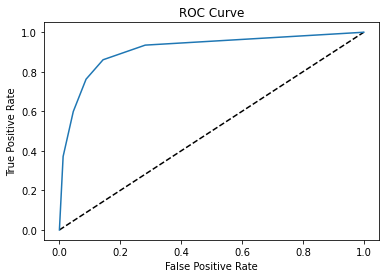



Area under curve: 0.91



Cross Validation Scores
------------------------------------------------------------
AUC scores computed using 5-fold cross-validation: [0.82805288 0.85441343 0.94360159 0.94220896 0.7245283 ]
AUC average: 0.86
AUC standard deviation: 0.08


In [21]:
knn_model_eval()

# 8. Tune hyperparameters

In [22]:
# Check hyperparameters of model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Use GridSearchCV to search for best value for n_neighbors

In [23]:
# Set steps for Pipeline - scaling and initialize model
steps = [('scaler', StandardScaler()), 
        ('knn', KNeighborsClassifier())]

# Call pipeline with steps
pipeline = Pipeline(steps)

# Set numpy range for candidate parameters (n_neighbors)
parameters = {'knn__n_neighbors': np.arange(1,15)}

# Split testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Call GridSearchCV with pipeline and range of candidate n_neighbor values
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit cv to data
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [24]:
# Return best parameter for n_neighbors

print("Tuned Model Parameters: {}".format(cv.best_params_))

Tuned Model Parameters: {'knn__n_neighbors': 13}


#### Plot candidate n_neighbors values

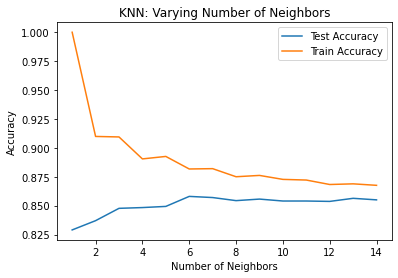

In [25]:
# Set range of potential n_neighbor values
neighbors = np.arange(1,15)
# Set train_accuracy equal to number of potential neighbor values
train_accuracy = np.empty(len(neighbors))
# Set test_accuracy equal to number of potential neighbor values
test_accuracy = np.empty(len(neighbors))

# Iterate through neighbors
for i, k in enumerate(neighbors):
    # Initialize knn models with increasing n_neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit data to each model
    knn.fit(X_train, y_train)
    # Append training accuracy score of model to training_accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    # Append test accuracy score of model to testing_accuracy
    test_accuracy[i] = knn.score(X_test, y_test)

# Set title
plt.title('KNN: Varying Number of Neighbors')
# Plot test accuracy
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
# Plot training accuracy
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
# Plot title legend
plt.legend()
# Plot x labels
plt.xlabel('Number of Neighbors')
# Plot y labels
plt.ylabel('Accuracy')
plt.show()

# 10. Hyperparameter tuned model

In [26]:
# Set independent variables
X = churn_numeric[['Tenure', 'MonthlyCharge', 'Contract_Month-to-month', 'StreamingMovies']].values
# Set dependent variable
y = churn_numeric['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=0.3, random_state=24)

# Create KNN classifier and set n_neighbors to 13
knn = KNeighborsClassifier(n_neighbors=13)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Use knn model to predict X_test values for comparison to actual y_test values
y_pred = knn.predict(X_test)

Test and train accuracy scores
------------------------------------------------------------
0.8857142857142857
0.8716666666666667



Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2206
           1       0.76      0.75      0.76       794

    accuracy                           0.87      3000
   macro avg       0.84      0.83      0.83      3000
weighted avg       0.87      0.87      0.87      3000




Confusion Matrix
------------------------------------------------------------


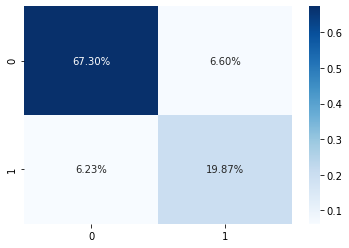




ROC & Precision Recall Curve
------------------------------------------------------------


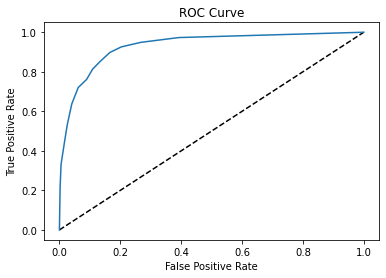



Area under curve: 0.93



Cross Validation Scores
------------------------------------------------------------
AUC scores computed using 5-fold cross-validation: [0.83297009 0.86505712 0.97317418 0.96250546 0.74171865]
AUC average: 0.88
AUC standard deviation: 0.09


In [27]:
knn_model_eval()

#### Export data for assessment review

In [28]:
# Export cleaned dataset
churn_numeric.to_csv('churn_clean_assessment_D209.csv', index=False)

In [29]:
# Set list of data and file names to iterate through
array_to_df = [X_train, X_test, y_train, y_test]
array_to_df_names = ['X_train', 'X_test', 'y_train', 'y_test']

# Iterate through and convert test and train data from arrays to dataframes and save as csv files
for x, xname in zip(array_to_df, array_to_df_names):
    df = pd.DataFrame(x)
    df.to_csv(xname+'.csv',index=False)